<a href="https://colab.research.google.com/github/GirishNaik711/CodeClauseInternship_Brain_Tumor_Classification/blob/main/Brain_Tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from keras.models import Sequential
from keras import layers
import os
from pathlib import Path
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
import glob
from sklearn.model_selection import train_test_split

filterwarnings("ignore", category = DeprecationWarning)
filterwarnings("ignore", category= FutureWarning)
filterwarnings("ignore", category= UserWarning)

#Path Initialization

We have the data in a zipfile in order to access the folders inside this zipfile we've go to **extract it in our colab notebook** , as colab doesn't support importing enitre folders



In [ ]:
from zipfile import ZipFile
file_name = 'archive.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print("DONE")

DONE


Path Objects

In [ ]:
#Folder Paths
no_data_path = Path('/content/no')
yes_data_path = Path('/content/yes')

# JPG Paths
no_jpg_path = list(no_data_path.glob(r"*.jpg"))
yes_jpg_path = list(yes_data_path.glob(r"*.jpg"))

print(no_jpg_path[:5])
print("-----" * 20)
print(yes_jpg_path[:5])

[PosixPath('/content/no/no521.jpg'), PosixPath('/content/no/no1370.jpg'), PosixPath('/content/no/no1315.jpg'), PosixPath('/content/no/no1360.jpg'), PosixPath('/content/no/no1056.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('/content/yes/y381.jpg'), PosixPath('/content/yes/y77.jpg'), PosixPath('/content/yes/y166.jpg'), PosixPath('/content/yes/y1300.jpg'), PosixPath('/content/yes/y526.jpg')]


In [ ]:
# Combining Both Jpg paths

yes_no_path_list = []

for no_jpg in no_jpg_path:
  yes_no_path_list.append(no_jpg)

for yes_jpg in yes_jpg_path:
  yes_no_path_list.append(yes_jpg)

Extracting Labels

In [ ]:
jpg_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], yes_no_path_list))
print(f"NO Count: ", jpg_labels.count("no"))
print(f"YES Count: ", jpg_labels.count("yes"))

NO Count:  1500
YES Count:  1500


#Making Test Set

In [ ]:
jpg_path_series = pd.Series(yes_no_path_list, name = 'JPG').astype(str)
jpg_label_series = pd.Series(jpg_labels, name= 'Tumor_Category')

main_train_data = pd.concat([jpg_path_series, jpg_label_series], axis = 1)
print(main_train_data.head(-1))

                         JPG Tumor_Category
0      /content/no/no521.jpg             no
1     /content/no/no1370.jpg             no
2     /content/no/no1315.jpg             no
3     /content/no/no1360.jpg             no
4     /content/no/no1056.jpg             no
...                      ...            ...
2994  /content/yes/y1217.jpg            yes
2995  /content/yes/y1017.jpg            yes
2996   /content/yes/y499.jpg            yes
2997   /content/yes/y427.jpg            yes
2998   /content/yes/y512.jpg            yes

[2999 rows x 2 columns]


Making Test Set

In [ ]:
prediction_path = Path('/content/pred')
pred_jpg_path = list(prediction_path.glob(r"*.jpg"))

#extracting labels

pred_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], pred_jpg_path))

#making a dataframe
pred_jpg_path_series = pd.Series(pred_jpg_path, name= 'JPG').astype(str)
pred_label_series = pd.Series(pred_labels, name= 'Tumor_Category')

pred_data = pd.concat([pred_jpg_path_series, pred_label_series], axis = 1)
print(pred_data.head())

                        JPG Tumor_Category
0  /content/pred/pred42.jpg           pred
1  /content/pred/pred48.jpg           pred
2  /content/pred/pred24.jpg           pred
3   /content/pred/pred4.jpg           pred
4  /content/pred/pred10.jpg           pred


#Shuffling

In [ ]:
main_train_data = main_train_data.sample(frac=1).reset_index(drop=True)

Visualizing few Images

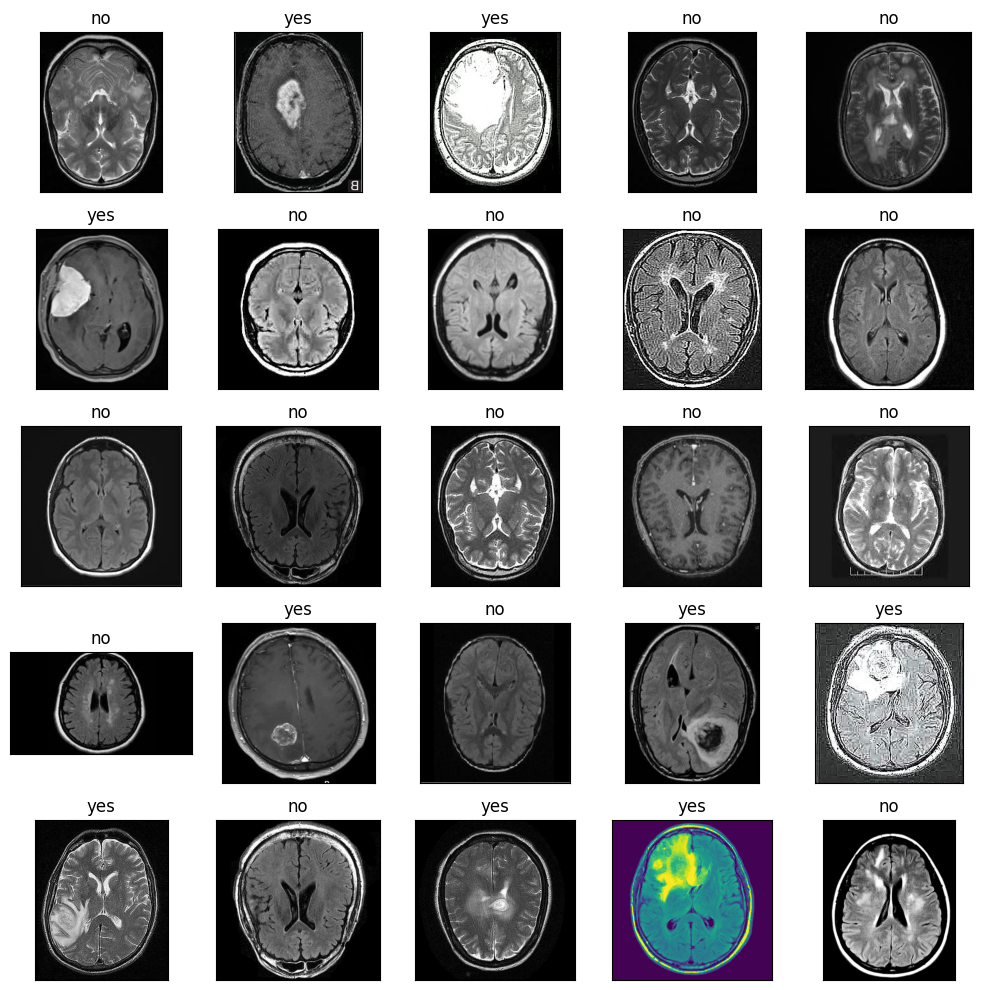

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=5, figsize=(10,10), subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(main_train_data["JPG"][i]))
  ax.set_title(main_train_data["Tumor_Category"][i])

plt.tight_layout()
plt.show()

Model Training Data

In [ ]:
train_data, test_data = train_test_split(main_train_data, train_size = 0.9, random_state = 42)
print(train_data.shape)
print(test_data.shape)

(2700, 2)
(300, 2)


#Image Data Generator Without Diversification

In [ ]:
basic_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)

#Training
train_set = basic_generator.flow_from_dataframe(dataframe=train_data,
                                           x_col = 'JPG',
                                           y_col = 'Tumor_Category',
                                           color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           subset = 'training',
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

#Validation
valid_set = basic_generator.flow_from_dataframe(dataframe=train_data,
                                           x_col = 'JPG',
                                           y_col = 'Tumor_Category',
                                           color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           subset = 'validation',
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

#Test
test_set = basic_generator.flow_from_dataframe(dataframe=test_data,
                                           x_col = 'JPG',
                                           y_col = 'Tumor_Category',
                                           color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

Found 2430 validated image filenames belonging to 2 classes.
Found 270 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


Checking

In [ ]:
for data_batch, label_batch in train_set:
  print("Train Data Shape: ", data_batch.shape)
  print("Train Label Shape: ", label_batch.shape)
  break

for data_batch, label_batch in valid_set:
  print("Valid Data Shape: ", data_batch.shape)
  print("Valid Label Shape: ", label_batch.shape)
  break

for data_batch, label_batch in test_set:
  print("Test Data Shape: ", data_batch.shape)
  print("Test Label Shape: ", label_batch.shape)
  break

Train Data Shape:  (20, 200, 200, 1)
Train Label Shape:  (20, 2)
Valid Data Shape:  (20, 200, 200, 1)
Valid Label Shape:  (20, 2)
Test Data Shape:  (20, 200, 200, 1)
Test Label Shape:  (20, 2)


In [ ]:
print('Train')
print(train_set.class_indices)
print(train_set.classes[:5])
print(train_set.image_shape)

print('\nValid')
print(valid_set.class_indices)
print(valid_set.classes[:5])
print(valid_set.image_shape)

print('\nTest')
print(test_set.class_indices)
print(test_set.classes[:5])
print(test_set.image_shape)

Train
{'no': 0, 'yes': 1}
[0, 0, 1, 1, 1]
(200, 200, 1)

Valid
{'no': 0, 'yes': 1}
[1, 1, 1, 1, 1]
(200, 200, 1)

Test
{'no': 0, 'yes': 1}
[0, 1, 0, 1, 0]
(200, 200, 1)


#CNN Model for Non-Diversified Data

In [ ]:
model_one = Sequential()

model_one.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (200,200,1)))
model_one.add(MaxPool2D(2,2))
model_one.add(Dropout(0.2))

model_one.add(Conv2D(64, (3,3), activation = 'relu'))
model_one.add(MaxPool2D(2,2))
model_one.add(Dropout(0.2))

model_one.add(Conv2D(128, (3,3), activation = 'relu'))
model_one.add(MaxPool2D(2,2))
model_one.add(Dropout(0.2))

model_one.add(Conv2D(256, (3,3), activation = 'relu'))
model_one.add(MaxPool2D(2,2))
model_one.add(Dropout(0.2))

model_one.add(Flatten())
model_one.add(Dropout(0.5))
model_one.add(Dense(512, activation = 'relu'))
model_one.add(Dense(2, activation = 'softmax'))

In [ ]:
model_one.compile(optimizer = RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ANN_model_one = model_one.fit(train_set, validation_data = valid_set, epochs = 10, steps_per_epoch = 120)

Epoch 1/10
120/120 [==============================] - 7s 56ms/step - loss: 0.0835 - accuracy: 0.9690 - val_loss: 0.1812 - val_accuracy: 0.9593
Epoch 2/10
120/120 [==============================] - 8s 63ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.1253 - val_accuracy: 0.9704
Epoch 3/10
120/120 [==============================] - 8s 69ms/step - loss: 0.0777 - accuracy: 0.9715 - val_loss: 0.1550 - val_accuracy: 0.9667
Epoch 4/10
120/120 [==============================] - 7s 59ms/step - loss: 0.0624 - accuracy: 0.9828 - val_loss: 0.1313 - val_accuracy: 0.9741
Epoch 5/10
120/120 [==============================] - 11s 88ms/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.3217 - val_accuracy: 0.9333
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.2854 - val_accuracy: 0.9556
Epoch 7/10
120/120 [==============================] - 8s 63ms/step - loss: 0.0705 - accuracy: 0.9816 - val_loss: 0.1039 - val_accuracy: 0.974

In [ ]:
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

Plotting the aspects of the training

In [ ]:
history_dict_one = ANN_model_one.history

acc = history_dict_one['accuracy']
loss = history_dict_one['loss']
val_acc = history_dict_one['val_accuracy']
val_loss = history_dict_one['val_loss']
epochs = range(1, len(val_loss) +1)

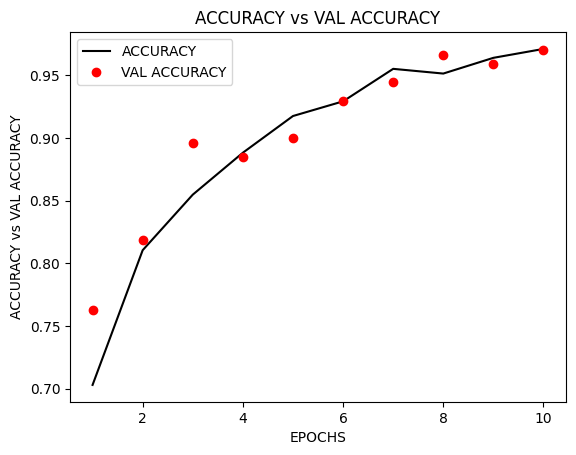

In [ ]:
plt.plot(epochs, acc, 'k-', label = "ACCURACY")
plt.plot(epochs, val_acc, 'ro', label = "VAL ACCURACY")
plt.title("ACCURACY vs VAL ACCURACY")
plt.xlabel('EPOCHS')
plt.ylabel("ACCURACY vs VAL ACCURACY")
plt.legend()
plt.show()

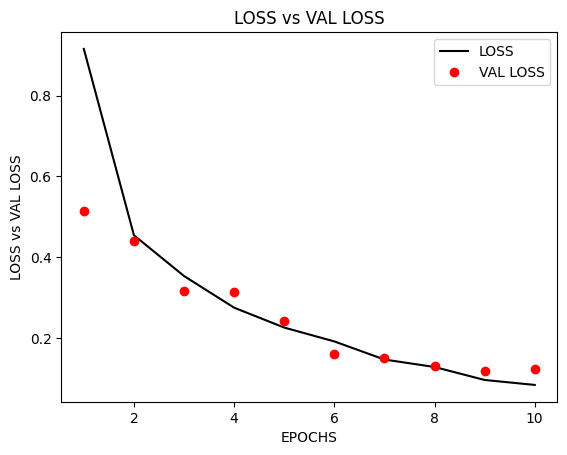

In [ ]:
plt.plot(epochs, loss, 'k-', label = "LOSS")
plt.plot(epochs, val_loss, 'ro', label = "VAL LOSS")
plt.title("LOSS vs VAL LOSS")
plt.xlabel('EPOCHS')
plt.ylabel("LOSS vs VAL LOSS")
plt.legend()
plt.show()

In [ ]:
summary_dict = pd.DataFrame(ANN_model_one.history)
summary_dict.plot

#Prediction

In [ ]:
ANN_model_one_results = model_one.evaluate(test_set, verbose=False)
print("LOSS: %.2f" % ANN_model_one_results[0])
print("ACCURACY: %.2f" % ANN_model_one_results[1])

LOSS: 0.08
ACCURACY: 0.97


In [ ]:
main_prediction_data = pd.DataFrame({'JPG': pred_jpg_path_series})
print(main_prediction_data.head())

                        JPG
0  /content/pred/pred42.jpg
1  /content/pred/pred48.jpg
2  /content/pred/pred24.jpg
3   /content/pred/pred4.jpg
4  /content/pred/pred10.jpg


In [ ]:
main_test_generator = ImageDataGenerator(rescale = 1./255)

main_test_set = main_test_generator.flow_from_dataframe(dataframe = main_prediction_data,
                                                        x_col = 'JPG',
                                                        y_col = None,
                                                        class_mode = None,
                                                        color_mode = 'grayscale',
                                                        batch_size = 20,
                                                        target_size = (200,200))

Found 60 validated image filenames.


In [ ]:
ANN_model_one_prediction = model_one.predict(main_test_set)
ANN_model_one_prediction = ANN_model_one_prediction.argmax(axis=-1)
print(ANN_model_one_prediction)

3/3 [==============================] - 0s 39ms/step
[1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1]


In [ ]:
prediction_one = []
[prediction_one.append('NO') if i == 1 else prediction_one.append('Tumor') for i in ANN_model_one_prediction]
print(prediction_one)


['NO', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'NO', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'NO', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'NO', 'NO']


" Last_Prediction = []\n[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]\nprint(Last_Prediction) "

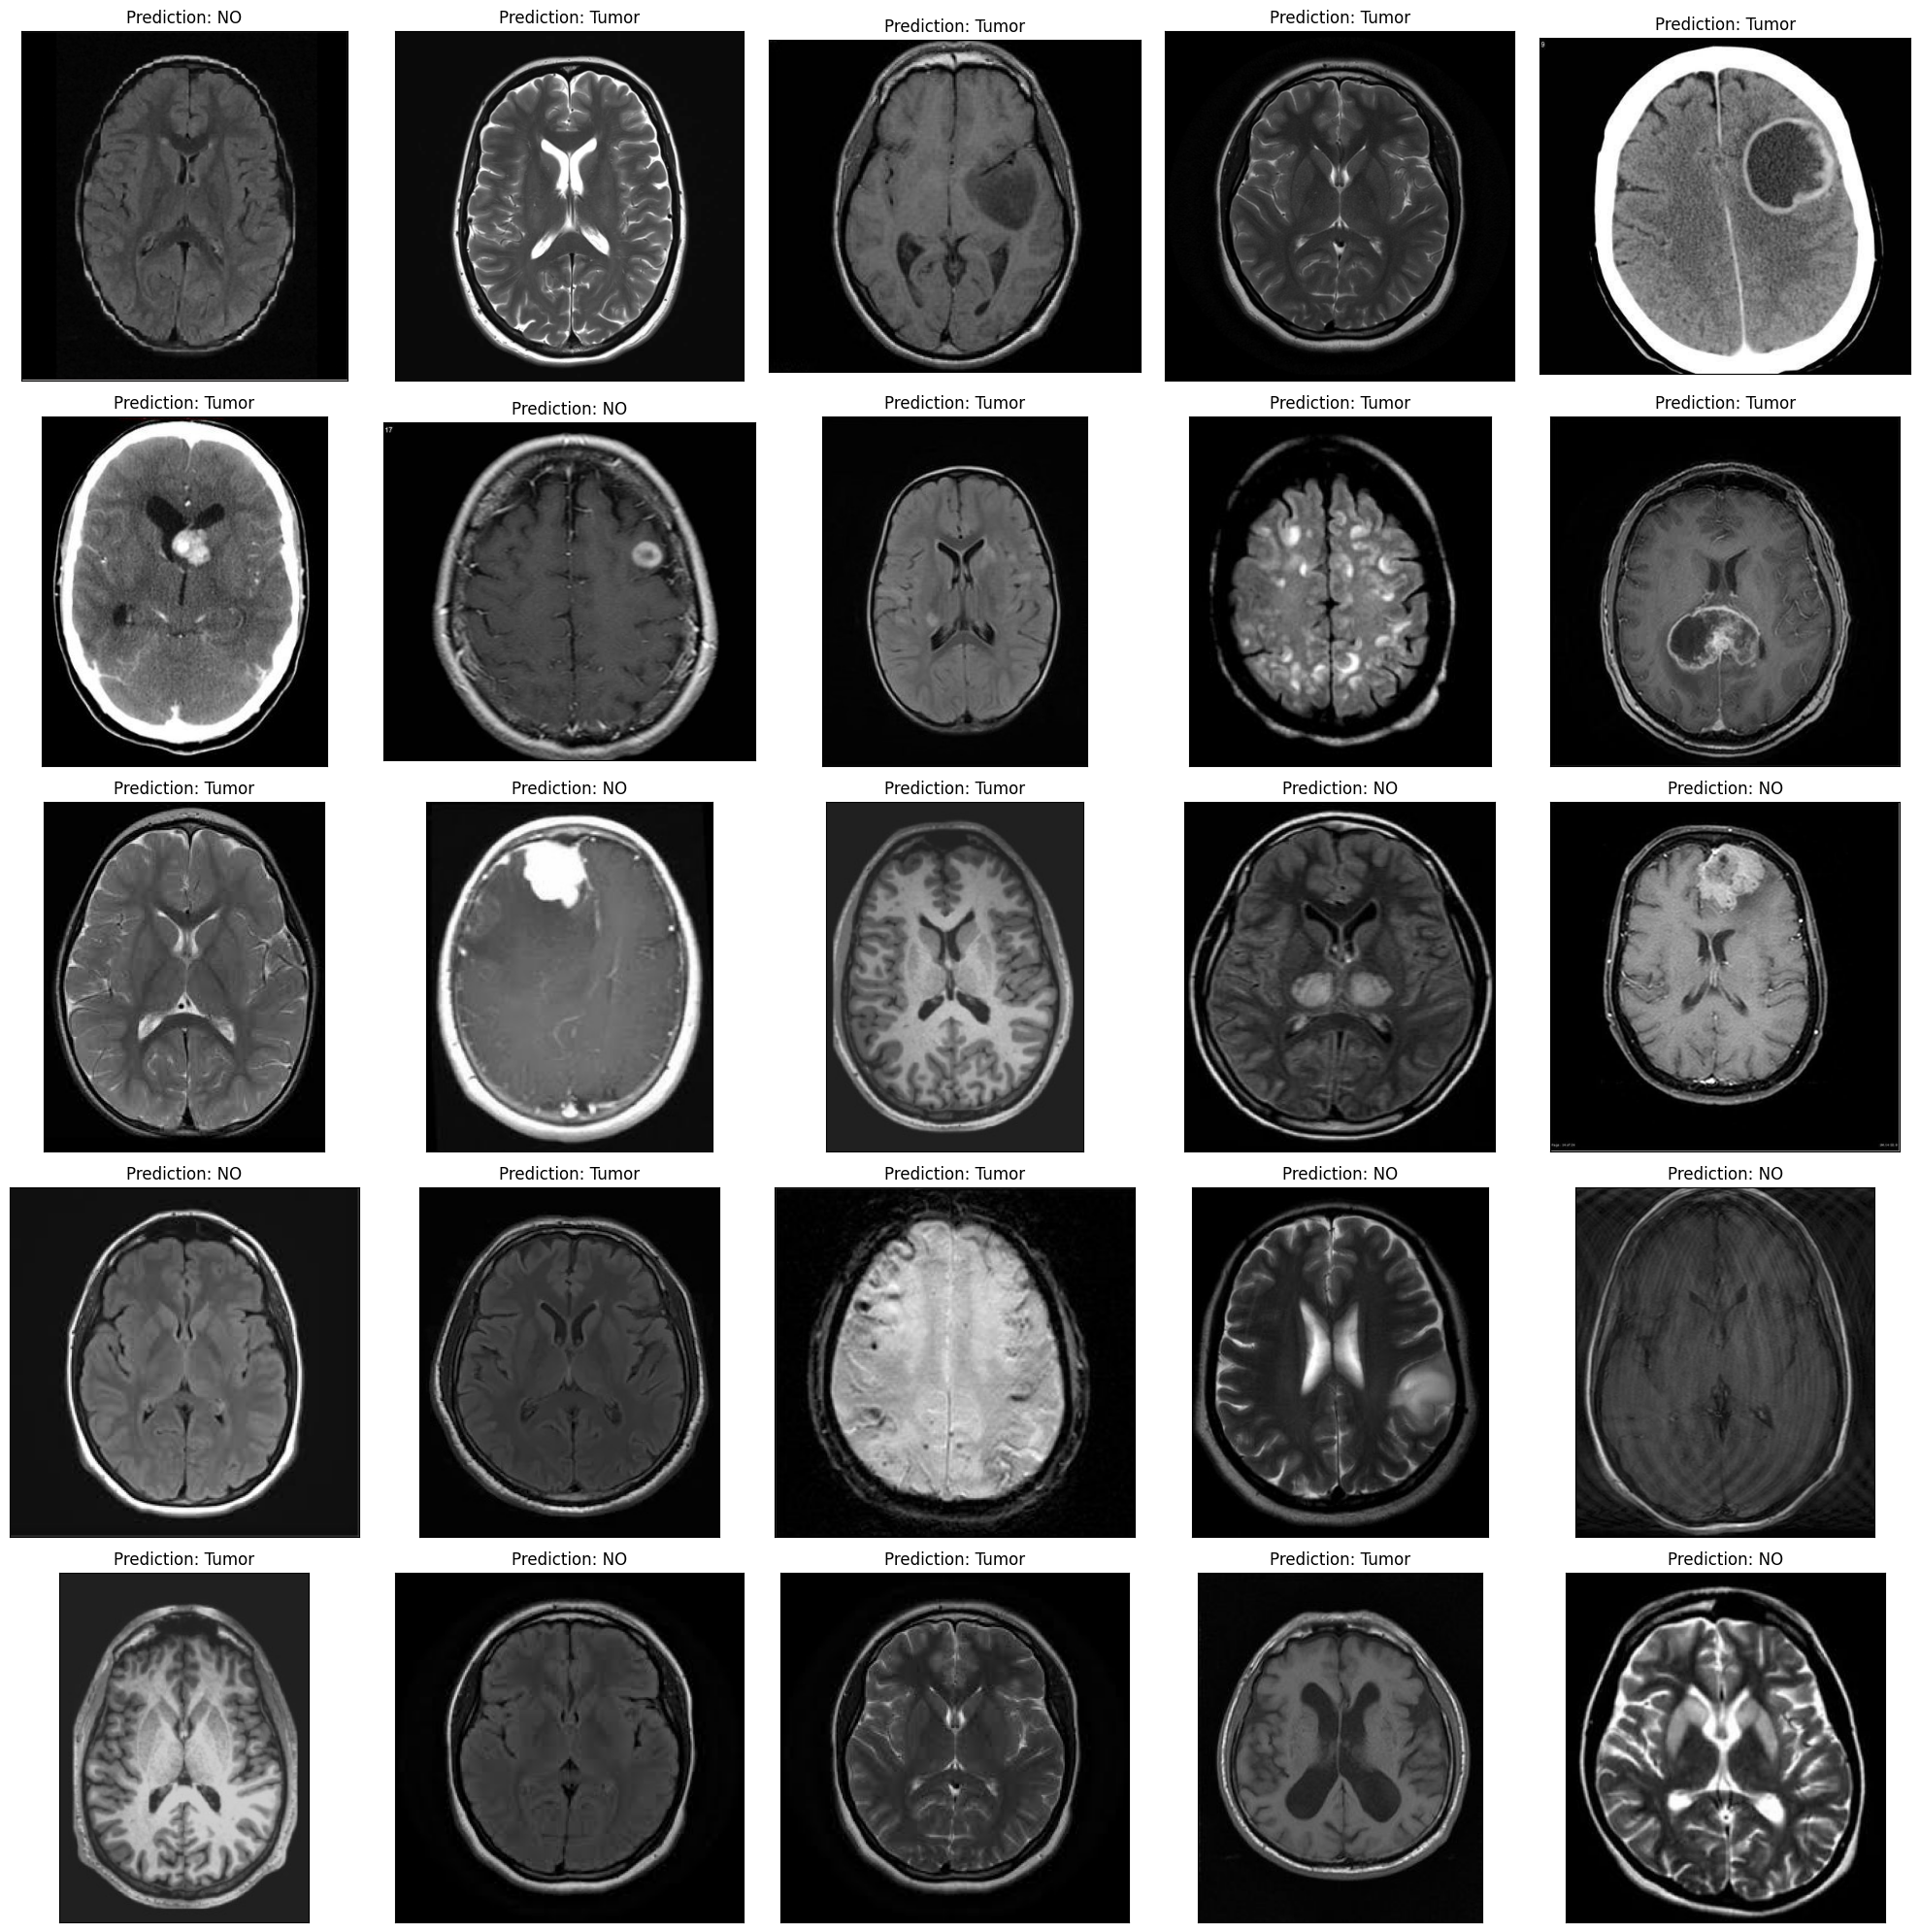

In [ ]:
fig,axes = plt.subplots(nrows= 5, ncols = 5, figsize = (20,20), subplot_kw = { 'xticks' : [], 'yticks' : [] } )

for i,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(main_prediction_data["JPG"][i]))
  ax.set_title(f"Prediction: {prediction_one[i]}")

plt.tight_layout()
plt.show()


#Executing the Model with Diversified Images

In [ ]:
div_data_generator = ImageDataGenerator(rescale = 1./255,
                                        brightness_range = [0.3,0.9],
                                        rotation_range = 30,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = 'nearest',
                                        validation_split = 0.1
                                        )

In [ ]:
#div_Training
div_train_set = basic_generator.flow_from_dataframe(dataframe=train_data,
                                           x_col = 'JPG',
                                           y_col = 'Tumor_Category',
                                           color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           subset = 'training',
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

#div_Validation
div_valid_set = basic_generator.flow_from_dataframe(dataframe=train_data,
                                           x_col = 'JPG',
                                           y_col = 'Tumor_Category',
                                           color_mode = 'grayscale',
                                           class_mode = 'categorical',
                                           subset = 'validation',
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

#div_Test
div_test_set = basic_generator.flow_from_dataframe(dataframe=main_prediction_data,
                                           x_col = 'JPG',
                                           y_col = None,
                                           color_mode = 'grayscale',
                                           class_mode = None,
                                           batch_size = 20,
                                           target_size = (200,200)
                                           )

Found 2430 validated image filenames belonging to 2 classes.
Found 270 validated image filenames belonging to 2 classes.
Found 60 validated image filenames.


In [ ]:
model_two = Sequential()

model_two.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (200,200,1)))
model_two.add(MaxPool2D(2,2))

model_two.add(Conv2D(64, (3,3), activation = 'relu'))
model_two.add(MaxPool2D(2,2))

model_two.add(Conv2D(128, (3,3), activation = 'relu'))
model_two.add(MaxPool2D(2,2))

model_two.add(Conv2D(128, (3,3), activation = 'relu'))
model_two.add(MaxPool2D(2,2))

model_two.add(Conv2D(256, (3,3), activation = 'relu'))
model_two.add(MaxPool2D(2,2))

model_two.add(Flatten())
model_two.add(Dropout(0.5))
model_two.add(Dense(512, activation = 'relu'))
model_two.add(Dense(2, activation = 'softmax'))

In [ ]:
model_two.compile(optimizer = RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
ANN_model_two = model_two.fit(train_set, validation_data = div_valid_set, batch_size = 20, epochs = 50)

Epoch 1/50
122/122 [==============================] - 8s 58ms/step - loss: 0.5970 - accuracy: 0.7156 - val_loss: 0.4816 - val_accuracy: 0.7963
Epoch 2/50
122/122 [==============================] - 6s 47ms/step - loss: 0.4068 - accuracy: 0.8255 - val_loss: 0.5080 - val_accuracy: 0.8593
Epoch 3/50
122/122 [==============================] - 8s 67ms/step - loss: 0.3003 - accuracy: 0.8724 - val_loss: 0.2761 - val_accuracy: 0.8963
Epoch 4/50
122/122 [==============================] - 8s 62ms/step - loss: 0.2237 - accuracy: 0.9107 - val_loss: 0.2504 - val_accuracy: 0.9370
Epoch 5/50
122/122 [==============================] - 7s 54ms/step - loss: 0.1662 - accuracy: 0.9407 - val_loss: 0.1660 - val_accuracy: 0.9444
Epoch 6/50
122/122 [==============================] - 6s 52ms/step - loss: 0.1215 - accuracy: 0.9556 - val_loss: 0.1925 - val_accuracy: 0.9407
Epoch 7/50
122/122 [==============================] - 7s 54ms/step - loss: 0.1082 - accuracy: 0.9646 - val_loss: 0.2621 - val_accuracy: 0.9111

In [ ]:
model_two.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 128)     

In [ ]:
history_dict_two = ANN_model_two.history

acc_two = history_dict_two['accuracy']
loss_two = history_dict_two['loss']
val_acc_two = history_dict_two['val_accuracy']
val_loss_two = history_dict_two['val_loss']
epochs_two = range(1, len(val_loss_two) +1)

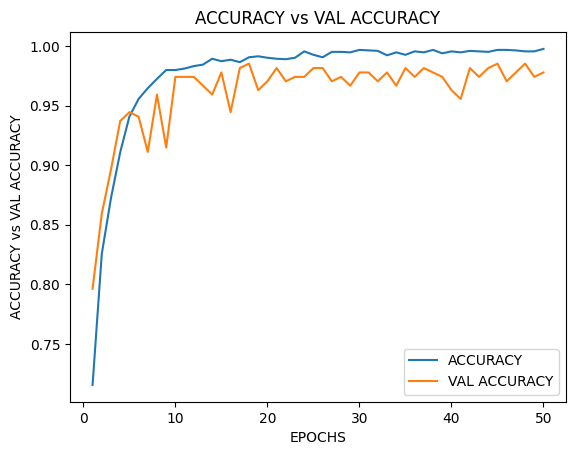

In [ ]:
plt.plot(epochs_two, acc_two, label = "ACCURACY")
plt.plot(epochs_two, val_acc_two, label = "VAL ACCURACY")
plt.title("ACCURACY vs VAL ACCURACY")
plt.xlabel('EPOCHS')
plt.ylabel("ACCURACY vs VAL ACCURACY")
plt.legend()
plt.show()

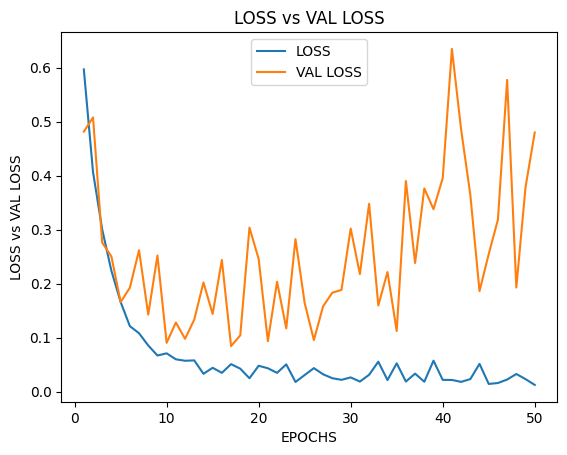

In [ ]:
plt.plot(epochs_two, loss_two,  label = "LOSS")
plt.plot(epochs_two, val_loss_two,  label = "VAL LOSS")
plt.title("LOSS vs VAL LOSS")
plt.xlabel('EPOCHS')
plt.ylabel("LOSS vs VAL LOSS")
plt.legend()
plt.show()

In [ ]:
summary_dict_two = pd.DataFrame(ANN_model_two.history)
summary_dict_two.plot

In [ ]:
ANN_model_two_results = model_two.evaluate(test_set, verbose = False)
print("LOSS: " + '%.2f' % ANN_model_two_results[0])
print("ACCURACY: " + '%.2f' % ANN_model_two_results[1])

LOSS: 0.18
ACCURACY: 0.99


In [ ]:
ANN_model_two_prediction = model_two.predict(main_test_set)
ANN_model_two_prediction = ANN_model_two_prediction.argmax(axis=-1)
print(ANN_model_two_prediction)

3/3 [==============================] - 0s 55ms/step
[0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [ ]:
prediction_two = []
[prediction_two.append('NO') if i == 1 else prediction_two.append('Tumor') for i in ANN_model_two_prediction]
print(prediction_two)

['Tumor', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'NO', 'NO', 'NO', 'Tumor', 'NO', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'NO', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'Tumor', 'Tumor', 'NO', 'Tumor', 'Tumor', 'Tumor', 'NO', 'Tumor', 'NO', 'NO', 'NO']


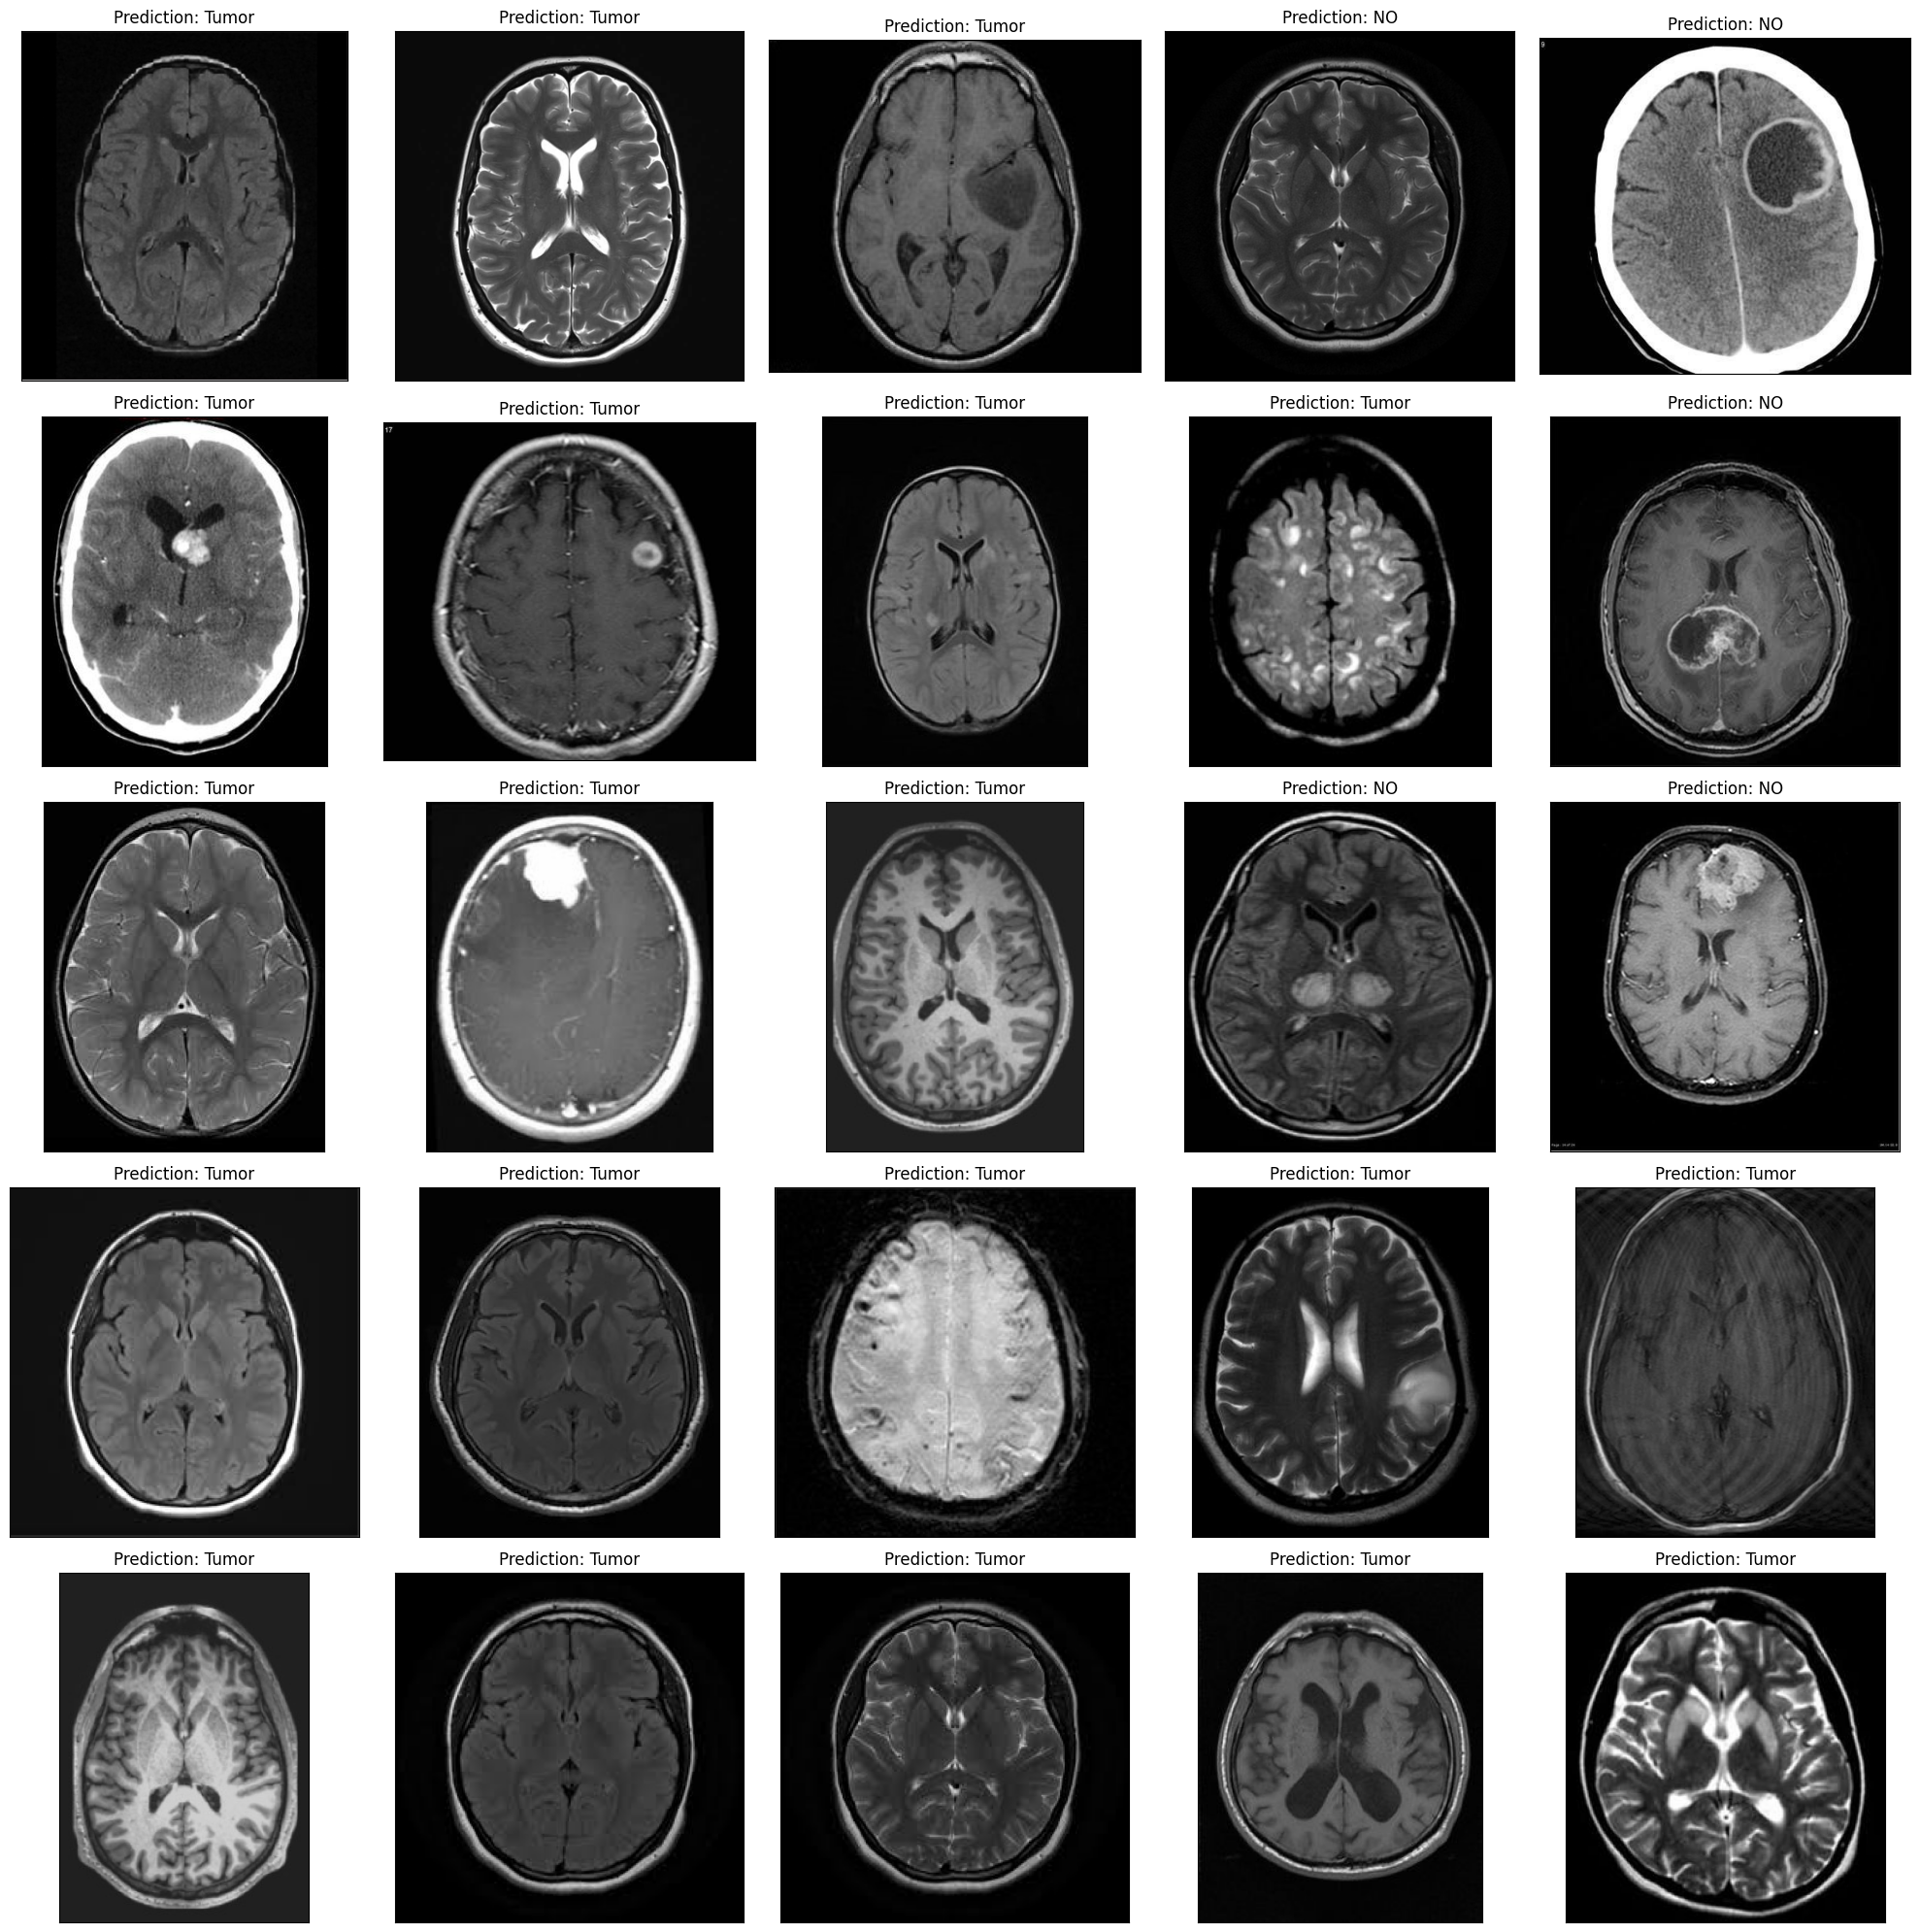

In [ ]:
fig,axes = plt.subplots(nrows= 5, ncols = 5, figsize = (20,20), subplot_kw = { 'xticks' : [], 'yticks' : [] } )

for i,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(main_prediction_data["JPG"][i]))
  ax.set_title(f"Prediction: {prediction_two[i]}")

plt.tight_layout()
plt.show()
